# DA Practice 3: Hatred on Twitter During MeToo Movement


[Data modeling](https://en.wikipedia.org/wiki/Data_modeling) is a crucial process in information management that involves the creation of a conceptual, logical, and physical representation of data. It provides a structured approach for organizing and storing data in a database, enabling efficient access and retrieval of information. Effective data modeling ensures the accuracy, consistency, and integrity of data by establishing clear relationships between data elements and defining their attributes.

In this report, I will provide an overview of data modeling, including its importance, process, and techniques used in developing a data model. I will then demonstrate the application of data modeling by using a dataset that the teacher sent from kaggle. Additionally, I will explain the steps involved in the data modeling process. This is to cover modeling aspects that I can still imporve on.

## Data set

This [dataset](https://www.kaggle.com/datasets/rahulgoel1106/hatred-on-twitter-during-metoo-movement) belongs to the MeToo movement on Twitter. This movement was against the sexual harassment incidents and many people posted various hatred tweets. Using this dataset, we can build a model that can accurately classify hatred and non-hatred tweets to restrict its spread.

#  Insights from Tweet Prediction Data💡

**Here are the insights from the analysis:**

| Question | Insight |
| ------- | ------- |
| How many rows and columns are in the dataset? | The dataset contains 807174 rows and 10 columns. |
| What is the percentage of hateful vs non-hateful tweets in the dataset? | There are aprox. 88% hateful 11% non-hateful. |
| What is the percentage of diabetes in the dataset? | There are aprox. 8% diabetes. |
| Are there all tweets relevant? | There are a lot of irelevant tweets, one character tweets and random emojis tweets. |
| Is the dataset reliable? | This dataset is not as relaiable. |


**Based on the EDA visualizations, here are some additional insights:**

    Usually a hateful tweet have more characters.
    Most of the tweets have around 60 characters.
    The words length is aprox. the same in hateful and non-hateful tweets.
    A hateful tweet is retweeted way more than a non-hateful one.
    A hateful tweet is favorited way more than a non-hateful one.



## Problem definition

**Research question: How do we build a model that is able to separate hateful vs. non-hateful tweets?**

The main focus of this project is to build a model that is able to separate hateful vs. non-hateful tweets, this is done using a few feature columns related to tweets.

Other questions to answer:

What is the impact of the unbalanced data on your results? How can you mitigate it? 
What is the implication of using the random sampler, should we sample before diving the data into train and test, or after it?
What happens if we apply the model trained on the sampled data on the entire dataset, does it work?

## Loading the libraries

I load some Data Analytics libraries first:

In [2]:
import numpy as np  # import auxiliary library, typical idiom
import pandas as pd  # import the Pandas library, typical idiom
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import string
import re
import nltk

Now, I selectively import the relevant classes and functions from `sklearn`
[(_SciKit Learn_, a Python library for machine learning)](http://scikit-learn.org/.) and `nltk` [(Natural Language Toolkit)](https://www.nltk.org/)

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /home/eduard/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/eduard/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/eduard/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

Color paletter for data exploration.

In [4]:
custom_palette = ['#586994', '#143109', '#FFDDD2', '#D8FFDD', '#95C623']

## Getting to know the data

Tweets of different people.

In [5]:
df = pd.read_csv('Data/MeTooHate.csv')
df.head(5)

,status_id,text,created_at,favorite_count,retweet_count,location,followers_count,friends_count,statuses_count,category
0,1046207313588236290,"Entitled, obnoxious, defensive, lying weasel. ...",2018-09-30T01:17:15Z,5,1,"McAllen, TX",2253,2303,23856,0
1,1046207328113086464,Thank you and for what you did for the women...,2018-09-30T01:17:19Z,5,2,"Tampa, FL",2559,4989,19889,0
2,1046207329589493760,Knitting (s) &amp; getting ready for January 1...,2018-09-30T01:17:19Z,0,0,"St Cloud, MN",16,300,9,0
3,1046207341283168256,Yep just like triffeling women weaponized thei...,2018-09-30T01:17:22Z,1,0,flyover country,3573,3732,38361,1
4,1046207347016826880,"No, the President wants to end movement posin...",2018-09-30T01:17:23Z,0,0,World,294,312,7635,0


In [6]:
df.columns

Index(['status_id', 'text', 'created_at', 'favorite_count', 'retweet_count',
       'location', 'followers_count', 'friends_count', 'statuses_count',
       'category'],
      dtype='object')

Dataset contains 10 columns, each are:

    status_id: A unique id for each tweet [numeric].
    text: tweet text data [string].
    created_at: The timestamp of the tweet [timestamp].
    favourite_count: favourite count of the user of the tweet [numeric].
    retweet_count: retweet count of the tweet [numeric].
    location: location mentioned by the user while tweeting [string].
    followers_count: user's followers' count [numeric].
    friends_count: user's friends' count [numeric].
    statuses_count: user's total statuses count [numeric].
    category: target variable, whether tweet belongs to hatred (category=1) or non-hatred (catogory=0).


The size of the dataset is 807174 x 10

In [7]:
df.shape

(807174, 10)

The dataset columns are the following types:

In [8]:
df.dtypes

status_id           int64
text               object
created_at         object
favorite_count      int64
retweet_count       int64
location           object
followers_count     int64
friends_count       int64
statuses_count      int64
category            int64
dtype: object

In [9]:
text = df['text'].unique()
text

array(['Entitled, obnoxious, defensive, lying weasel. This thing is to make decisions that may affect my life? He is a women hater.   ',
       'Thank you  and  for what you did for the women and survivors this week.  \n',
       'Knitting (s) &amp; getting ready for January 19, 2019.     ', ...,
       'Did the  movement count the dollars of Erin Andrews? Just wondering? ',
       "This is one of my all time fav songs &amp; videos! It's brutally honest &amp; uncomfortable but also hopeful &amp; so well shot. Watch it, it might change you. Can't wait for 's Europe tour &amp; finally getting to see her live!! 🖤",
       " I watched your news on the death of the sailor in the famous WW2 'The Kiss' photo. While its OK for RIP to the sailor you reporting completely missed that the nurse in the photo DID NOT want to be kissed &amp; felt assaulted in that photo. In a  area, you failed."],
      dtype=object)

In [10]:
location = df['location'].unique()
location

array(['McAllen, TX', 'Tampa, FL', 'St Cloud, MN', ...,
       'The Land of the Shadowbanned', 'NYC, NC, FL, DC, Africa, India',
       'The Right Side Of History,  CA'], dtype=object)

In [11]:
statuses_count = df['statuses_count'].unique()
statuses_count

array([ 23856,  19889,      9, ..., 139798,  45481,  66966])

In [12]:
category = df['category'].unique()
category

array([0, 1])

Category is the target feature that we try to predict.

## Data Cleaning

The next step I plan to take is to look at different columns and identify any possible inconsistencies.

In [13]:
df.isnull().sum()

status_id               0
text                 3536
created_at              0
favorite_count          0
retweet_count           0
location           190780
followers_count         0
friends_count           0
statuses_count          0
category                0
dtype: int64

I have checked for null values, and it appears that there are a few null values in this dataset.

Location is not a meaningfull feature column in our use case but still I cannot aford to lose as much data by dropping the null values in location col, therefore I''m going to fill the null values with unknows.

In [14]:
df['location'] = df['location'].fillna("unknown")

In [15]:
# def clean_location(location):
#     # Remove leading and trailing whitespace
#     location = location.strip()
    
#     # Convert to lowercase
#     location = location.lower()
    
#     # Remove unnecessary characters or symbols
#     location = re.sub(r"[^\w\s]+", "", location)
    
#     # Extract city or country information
#     if ',' in location:
#         location_parts = location.split(',')
#         location = location_parts[0].strip()  # Extract the city
#     else:
#         location = location  # Keep the original location if no comma is found

#     return location

Due to the large size of this dataset, we have an abundance of samples for training a model. Consequently, I will remove the rows that contain duplicates and null values.

In [16]:
df.drop_duplicates(inplace=True)
df = df.dropna()

I'm going to create a new columns with the length of each tweet, this will help to get more insights.

In [17]:
df['chars'] = df['text'].str.len()

In [18]:
tweets_with_zero_text = df[df['chars'] == 1]['text']
tweets_with_zero_text

1612        
2503        
2908        
3092       :
4234       [
          ..
762325     📢
768856     [
770343     [
772782     📢
776258    \n
Name: text, Length: 139, dtype: object

## Data Preprocessing

Before I'm going to modify the data for the model, I'm going to make a copy that we can use for data exploration.

In [19]:
df_pre = df.copy()
df_pre.head(5)

,status_id,text,created_at,favorite_count,retweet_count,location,followers_count,friends_count,statuses_count,category,chars
0,1046207313588236290,"Entitled, obnoxious, defensive, lying weasel. ...",2018-09-30T01:17:15Z,5,1,"McAllen, TX",2253,2303,23856,0,126
1,1046207328113086464,Thank you and for what you did for the women...,2018-09-30T01:17:19Z,5,2,"Tampa, FL",2559,4989,19889,0,74
2,1046207329589493760,Knitting (s) &amp; getting ready for January 1...,2018-09-30T01:17:19Z,0,0,"St Cloud, MN",16,300,9,0,59
3,1046207341283168256,Yep just like triffeling women weaponized thei...,2018-09-30T01:17:22Z,1,0,flyover country,3573,3732,38361,1,194
4,1046207347016826880,"No, the President wants to end movement posin...",2018-09-30T01:17:23Z,0,0,World,294,312,7635,0,66


Remove rows with empty text & nulls.

In [20]:
df.dropna(inplace=True)
df.dropna(subset=['text'], inplace=True)

In [21]:
df.shape

(803638, 11)

In [22]:
df[df['text'] == '']

,status_id,text,created_at,favorite_count,retweet_count,location,followers_count,friends_count,statuses_count,category,chars


### Buiding a pipeline
A pipeline refers to a sequence of data processing steps applied to a DataFrame or a Series. It allows you to chain multiple operations together and apply them sequentially, simplifying the data transformation and analysis process.

**This pipeline goes as follows:**
    
    ⏩ Transform raw text
    ⏩ Remove punctuation 
    ⏩ Remove non-alphanumeric
    ⏩ Tokenization
    ⏩ Remove stop words
    ⏩ Stemming/Lemmatizing

In [23]:
class TextTransformer(BaseEstimator, TransformerMixin):
    def transform(self, X):
        return [self.transform_text(text) for text in X]
    
    def fit(self, X, y=None):
        return self
    
    def transform_text(self, text):
        text = str(text)
        text = text.lower()
        return text

In [24]:
class PunctuationRemover(BaseEstimator, TransformerMixin):
    def transform(self, X):
        return [self.remove_punctuation(text) for text in X]
    
    def fit(self, X, y=None):
        return self
    
    def remove_punctuation(self, text):
        if text.strip() == "":
            return text
        text_no_punct = ''.join([char for char in text if char not in string.punctuation])
        return text_no_punct

In [25]:
class NonAlphanumericRemover(BaseEstimator, TransformerMixin):
    def transform(self, X):
        return [self.remove_non_alphanumeric(text) for text in X]
    
    def fit(self, X, y=None):
        return self
    
    def remove_non_alphanumeric(self, text):
        if text.strip() == "":
            return text
        alphanumeric_chars = [ch for ch in text if ch.isalnum() or ch.isspace()]
        return ''.join(alphanumeric_chars)

In [26]:
class TextTokenizer(BaseEstimator, TransformerMixin):
    def transform(self, X):
        return [self.tokenize_text(text) for text in X]
    
    def fit(self, X, y=None):
        return self
    
    def tokenize_text(self, text):
        tokens = word_tokenize(text)
        return tokens

In [27]:
class StopwordRemover(BaseEstimator, TransformerMixin):
    def transform(self, X):
        return [self.remove_stopwords(tokens) for tokens in X]
    
    def fit(self, X, y=None):
        return self
    
    def remove_stopwords(self, tokens):
        stop_words = set(stopwords.words('english'))
        tokens_without_stopwords = [token for token in tokens if token.lower() not in stop_words]
        return tokens_without_stopwords

In [28]:
class StemmingTransformer(BaseEstimator, TransformerMixin):
    def transform(self, X):
        return [self.perform_stemming(tokens) for tokens in X]
    
    def fit(self, X, y=None):
        return self
    
    def perform_stemming(self, tokens):
        stemmer = PorterStemmer()
        stemmed_text = [stemmer.stem(word) for word in tokens]
        return stemmed_text

In [29]:
preprocessing_pipeline = Pipeline([
    ('text_transformer', TextTransformer()),
    ('punctuation_remover', PunctuationRemover()),
    ('non_alphanumeric_remover', NonAlphanumericRemover()),
    ('text_tokenizer', TextTokenizer()),
    ('stopword_remover', StopwordRemover()),
    ('stemming_transformer', StemmingTransformer())
])

preprocessing_pipeline

Pipeline(steps=[('text_transformer', TextTransformer()),
                ('punctuation_remover', PunctuationRemover()),
                ('non_alphanumeric_remover', NonAlphanumericRemover()),
                ('text_tokenizer', TextTokenizer()),
                ('stopword_remover', StopwordRemover()),
                ('stemming_transformer', StemmingTransformer())])

### Testing pipeline
I'm going to test the pipeline to see if works as expected.

In [30]:
data = {
    'text': [
        'Hello! This is a sample text.',
        'I love using 👻 scikit~~~learn.',
        'Preprocessng is an important step.',
        'The sun is shining.',
        'my favorite colour is green',
        'Let\'s test the pipeline.',
        '???!!!!??!'
    ]
}

test = pd.DataFrame(data)
test['text_after'] = preprocessing_pipeline.fit_transform(test['text'])
test

,text,text_after
0,Hello! This is a sample text.,"[hello, sampl, text]"
1,I love using 👻 scikit~~~learn.,"[love, use, scikitlearn]"
2,Preprocessng is an important step.,"[preprocessng, import, step]"
3,The sun is shining.,"[sun, shine]"
4,my favorite colour is green.,"[favorite, color, green]"
5,Let's test the pipeline.,"[let, test, pipelin]"
6,???!!!!??!,[]


Here is where I apply the pipeline on the actual dataset.

In [31]:
df['text'] = preprocessing_pipeline.fit_transform(df['text'])
df.head(5)

,status_id,text,created_at,favorite_count,retweet_count,location,followers_count,friends_count,statuses_count,category,chars
0,1046207313588236290,"[entitl, obnoxi, defens, lie, weasel, thing, m...",2018-09-30T01:17:15Z,5,1,"McAllen, TX",2253,2303,23856,0,126
1,1046207328113086464,"[thank, women, survivor, week]",2018-09-30T01:17:19Z,5,2,"Tampa, FL",2559,4989,19889,0,74
2,1046207329589493760,"[knit, amp, get, readi, januari, 19, 2019]",2018-09-30T01:17:19Z,0,0,"St Cloud, MN",16,300,9,0,59
3,1046207341283168256,"[yep, like, triffel, women, weapon, poon, wond...",2018-09-30T01:17:22Z,1,0,flyover country,3573,3732,38361,1,194
4,1046207347016826880,"[presid, want, end, movement, pose, movement]",2018-09-30T01:17:23Z,0,0,World,294,312,7635,0,66


Get rid of rows with no information.

In [32]:
df = df[~(df['text'].apply(lambda x: x == []))]

### TF-IDF (Term Frequency-Inverse Document Frequency)

Term Frequency-Inverse Document Frequency is a numerical statistic that reflects the importance of a term (word) in a document within a collection of documents. TF-IDF is commonly used in text mining and information retrieval to determine the relevance of a term to a document.

In [33]:
vectorizer = TfidfVectorizer()

documents = df['text'].tolist()
documents = [str(doc) for doc in documents]

tfidf_matrix = vectorizer.fit_transform(documents)

feature_names = vectorizer.get_feature_names_out()

for row in range(min(3, len(documents))):
    print("Document:", row + 1)
    top_terms = sorted([(feature_names[col], tfidf_matrix[row, col]) for col in tfidf_matrix[row].nonzero()[1]], key=lambda x: x[1], reverse=True)[:3]
    for term, tfidf in top_terms:
        print("  Term:", term, "- TF-IDF:", tfidf)

Document: 1
  Term: weasel - TF-IDF: 0.43327485578302016
  Term: obnoxi - TF-IDF: 0.3725136855189205
  Term: hater - TF-IDF: 0.33640166408283984
Document: 2
  Term: week - TF-IDF: 0.6188757208546728
  Term: survivor - TF-IDF: 0.5218450949116863
  Term: thank - TF-IDF: 0.5024627427824614
Document: 3
  Term: knit - TF-IDF: 0.559823555368468
  Term: januari - TF-IDF: 0.4375727699673274
  Term: 19 - TF-IDF: 0.4093821968976717


### Topic modeling with the Non-Negative Matrix Factorization (NMF)

Topic modeling with Non-Negative Matrix Factorization (NMF) is a method used to discover and extract hidden themes or topics from a collection of text documents. It aims to automatically identify common topics that occur across the documents without any prior knowledge or labeling.

NMF works by breaking down the documents into two smaller matrices: one representing how each document is related to each topic, and the other representing how each topic is related to each word in the documents. By analyzing these relationships, NMF helps us identify the most important words associated with each topic.

In [34]:
num_topics = 5
nmf_model = NMF(n_components=num_topics)
nmf_model.fit(tfidf_matrix)

feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(nmf_model.components_):
    top_words = [feature_names[i] for i in topic.argsort()[:-6:-1]]
    print(f"Topic {topic_idx+1}: {' '.join(top_words)}")

Topic 1: amp dont one get say
Topic 2: like video playlist ad look
Topic 3: movement india say start support
Topic 4: sexual harass assault accus alleg
Topic 5: women men era believ street


## Data Exploration

This is where I will try to analyze the data and find interesting facts. I'm going to see what is the average salary for each categorical feature that I plot. In order to choose what plot is most suitable for visualization I made use of a [webiste](https://www.data-to-viz.com/) that helps you in finding the best plot for your data. I have decided to use barplots in multiple instances because I want to maintain consistency throughout the document.

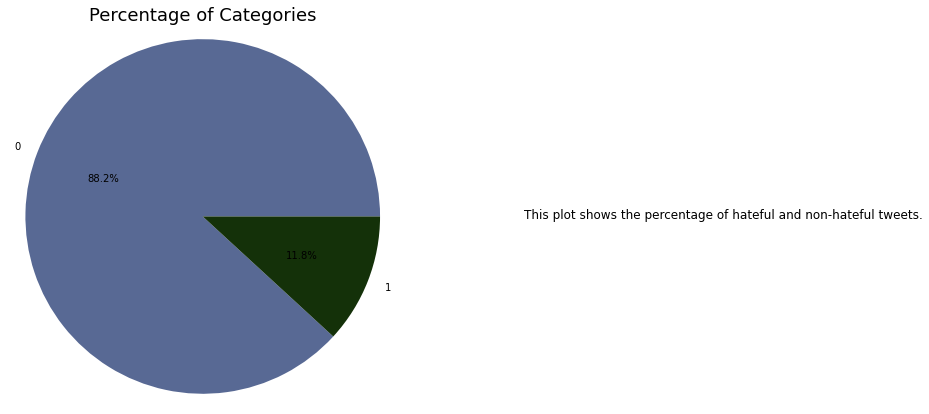

In [35]:
cat_counts = df_pre['category'].value_counts()
total_count = len(df_pre)

cat_percentage = (cat_counts / total_count) * 100

plt.figure(figsize=(7, 7))
plt.pie(cat_percentage, labels=cat_percentage.index, autopct='%1.1f%%', colors=custom_palette)
plt.title('Percentage of Categories', fontsize=18)
plt.axis('equal')
description = "This plot shows the percentage of hateful and non-hateful tweets."
plt.figtext(1.15, 0.5, description, ha='left', fontsize=12)
plt.show()

This plot tells me that this dataset is unbalanced.

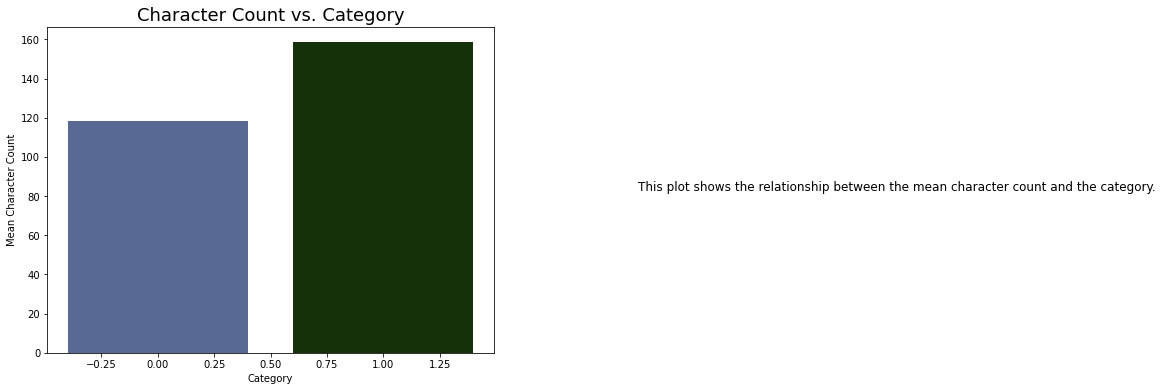

In [36]:
category_chars_mean = df_pre.groupby('category')['chars'].mean()
plt.figure(figsize=(8, 6))
plt.bar(category_chars_mean.index, category_chars_mean.values, color=custom_palette)
plt.xlabel('Category')
plt.ylabel('Mean Character Count')
plt.title('Character Count vs. Category', fontsize=18)

description = "This plot shows the relationship between the mean character count and the category."
plt.figtext(1.15, 0.5, description, ha='left', fontsize=12)

plt.show()

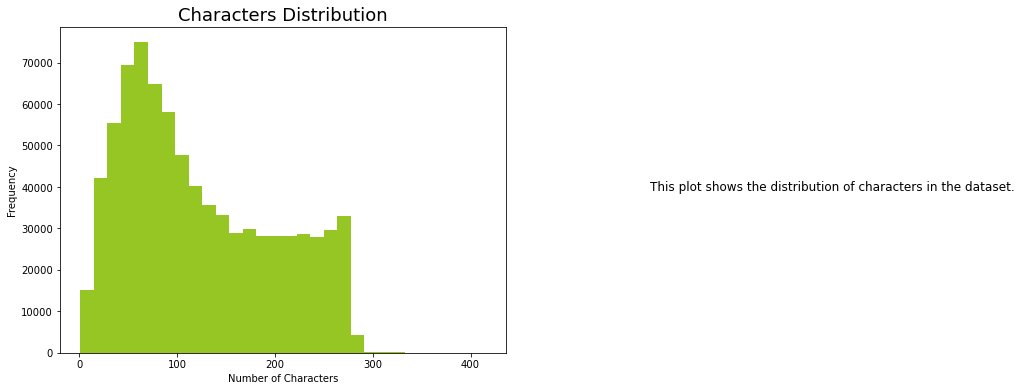

In [37]:
plt.figure(figsize=(8, 6))
plt.hist(df_pre['chars'], bins=30, color=custom_palette[4])
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.title('Characters Distribution', fontsize=18)

description = "This plot shows the distribution of characters in the dataset."
plt.figtext(1.15, 0.5, description, ha='left', fontsize=12)

plt.show()

In [38]:
df_pre['avg_word_length'] = df_pre['text'].apply(lambda x: np.mean([len(word) for word in x.split()]) if len(x.split()) > 0 else 0)

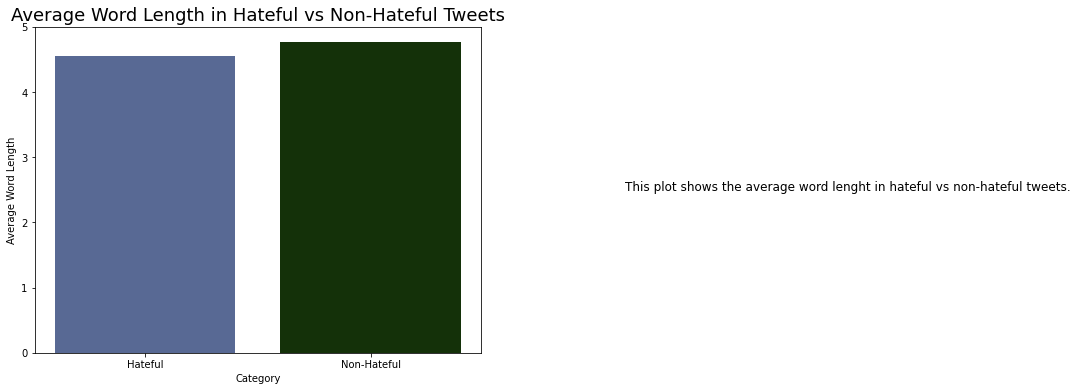

In [39]:
hateful_tweets = df_pre[df_pre['category'] == 1]
non_hateful_tweets = df_pre[df_pre['category'] == 0]

hateful_avg_word_length = hateful_tweets['avg_word_length']
non_hateful_avg_word_length = non_hateful_tweets['avg_word_length']
plt.figure(figsize=(8, 6))
plt.bar([0, 1], [hateful_avg_word_length.mean(), non_hateful_avg_word_length.mean()], color=custom_palette)
plt.xticks([0, 1], ['Hateful', 'Non-Hateful'])
plt.xlabel('Category')
plt.ylabel('Average Word Length')
plt.title('Average Word Length in Hateful vs Non-Hateful Tweets', fontsize=18)
description = "This plot shows the average word lenght in hateful vs non-hateful tweets."
plt.figtext(1.15, 0.5, description, ha='left', fontsize=12)
plt.show()


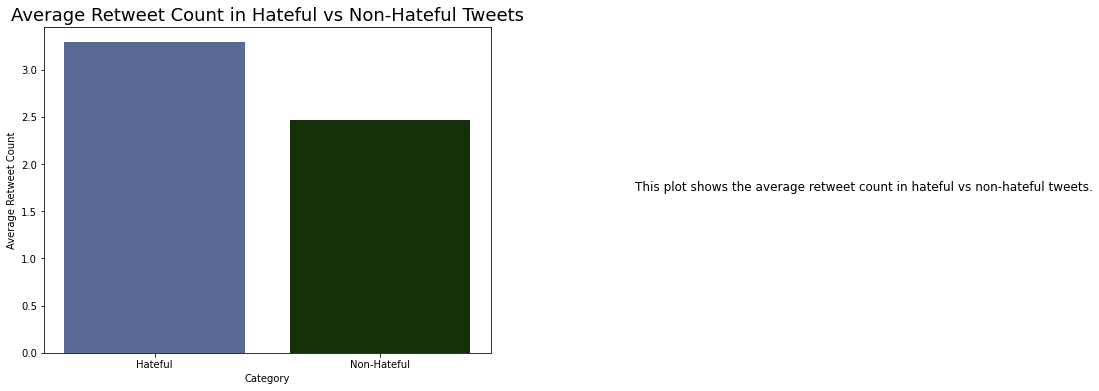

In [40]:
hateful_avg_retweet_count = hateful_tweets['retweet_count'].mean()
non_hateful_avg_retweet_count = non_hateful_tweets['retweet_count'].mean()
plt.figure(figsize=(8, 6))
plt.bar([0, 1], [hateful_avg_retweet_count, non_hateful_avg_retweet_count], color=custom_palette)
plt.xticks([0, 1], ['Hateful', 'Non-Hateful'])
plt.xlabel('Category')
plt.ylabel('Average Retweet Count')
plt.title('Average Retweet Count in Hateful vs Non-Hateful Tweets', fontsize=18)
description = "This plot shows the average retweet count in hateful vs non-hateful tweets."
plt.figtext(1.15, 0.5, description, ha='left', fontsize=12)
plt.show()

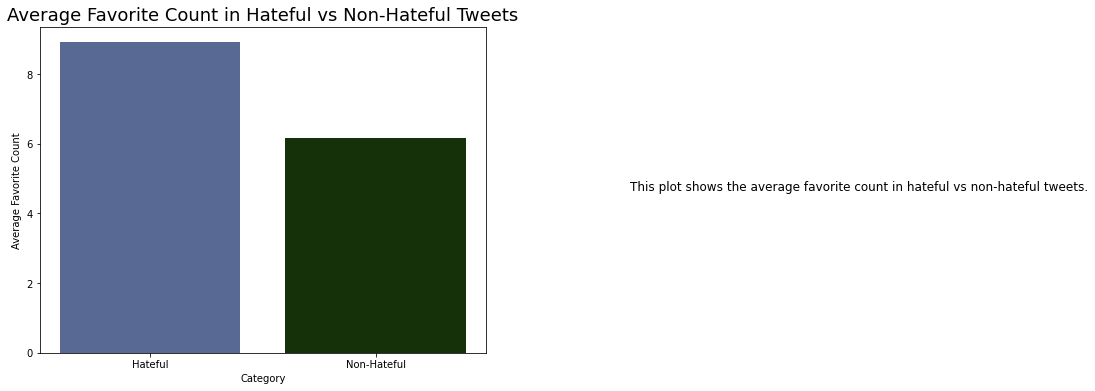

In [41]:
hateful_avg_favorite_count = hateful_tweets['favorite_count'].mean()
non_hateful_avg_favorite_count = non_hateful_tweets['favorite_count'].mean()
plt.figure(figsize=(8, 6))
plt.bar([0, 1], [hateful_avg_favorite_count, non_hateful_avg_favorite_count], color=custom_palette)
plt.xticks([0, 1], ['Hateful', 'Non-Hateful'])
plt.xlabel('Category')
plt.ylabel('Average Favorite Count')
plt.title('Average Favorite Count in Hateful vs Non-Hateful Tweets', fontsize=18)
description = "This plot shows the average favorite count in hateful vs non-hateful tweets."
plt.figtext(1.15, 0.5, description, ha='left', fontsize=12)
plt.show()

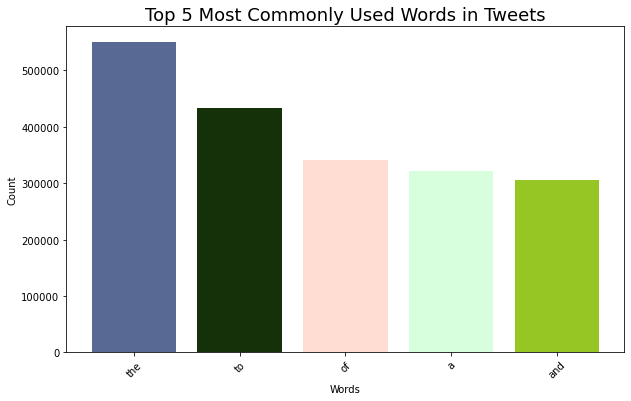

In [42]:
all_text = ' '.join(df_pre['text'])
words = all_text.split()
word_counts = Counter(words)
top_words = word_counts.most_common(5)

top_words_list = [word for word, count in top_words]
top_word_counts = [count for word, count in top_words]

plt.figure(figsize=(10, 6))
plt.bar(top_words_list, top_word_counts, color=custom_palette)
plt.xlabel('Words')
plt.ylabel('Count')
plt.title('Top 5 Most Commonly Used Words in Tweets', fontsize=18)
plt.xticks(rotation=45)
plt.show()

## Data Modeling

For this data and problem, we are advised to use multiple models logistic regression, decision tree classifier and K-nearest neighbor classifier. The next question that we have to answer is how to find the best hyperparameters. To answer this question, we can make use of a grid search with cross-validation using scikit-learn library. Grid search with cross-validation is a common technique for hyperparameter tuning, which involves searching over a specified range of hyperparameter values and evaluating the model's performance on a validation set using k-fold cross-validation. The combination of hyperparameter values that yields the best performance is then selected as the optimal hyperparameters for the model. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

**What is the impact of the unbalanced data on your results? How can you mitigate it?**
Second problem that I encounter is that this data is unbalanced this may affect the model accuracy in the end because it doesn't have enough samples. [Imblearn PyPI](https://pypi.org/project/imbalanced-learn/) is a package for imbalanced data, it provides a random under sampler tehnique to mitigate the problem. This works by lowering the amount of observation to match with the other class.

**Should we sample before diving the data into train and test, or after it? What happens if we apply the model trained on the sampled data on the entire dataset, does it work?**

I took the approach to sample the data after the training test split, it can be a good idea because it allows you to get a more accurate understanding of how well your model performs on unseen examples. Additionally it is crucial to simulate real-world scenarios as closely as possible. If we apply the model on the entire dataset it would work because it simulate the real-world scenarios, the model gets better understanding of the real settings.

In [43]:
df_backup = df.copy()
df = df.sample(n=10000)

### Select the data

Let's try to predict if a tweet is  `hateful` by training different models on the data.

### Train-Test split

X contains the releveant features for this prediction, later we are going to find out what are the most important features

In [44]:
X = df['text']
y = df['category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train.head(5)

443539    [wow, pay, femal, staff, 20, less, male, nazi,...
214739    [femin, turn, womenth, reaction, brett, kavana...
556145    [ok, kindli, share, stori, mother, want, know,...
510476                               [perfect, futur, case]
516617    [sonam, k, ahuja, shouldnt, quiet, fear, hurt,...
Name: text, dtype: object

### Balance the data

To proceed with the random under-sampling step, I can use the imblearn library to apply the random under-sampling technique to the training data.

**Before under-sampling**

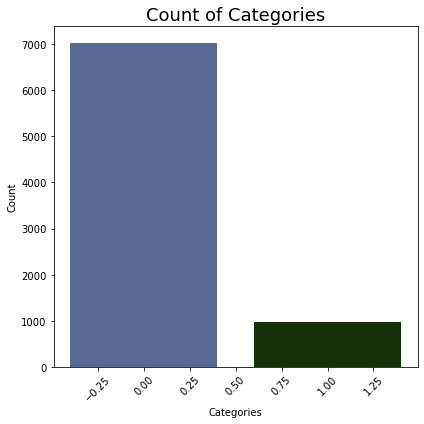

In [45]:
cat_counts = y_train.value_counts()

categories_counts_resampled = pd.Series(y_train).value_counts()
plt.figure(figsize=(6, 6))
plt.bar(cat_counts.index, cat_counts, color=custom_palette)
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Count of Categories', fontsize=18)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Under Sampler**

In [46]:
X_train = np.array(X_train).reshape(-1, 1)
under_sampler = RandomUnderSampler(random_state=0)

X_train, y_train = under_sampler.fit_resample(X_train, y_train)

**After under-sampling**

I can see that the under sampler shrinked down the cases where tweets are non-hateful to a more equal value like the ones who are hateful. To prevent the risk of overfitting, using an under-sampler in this case reduces the number of instances in the majority class this can work because we have enough datapoints in this dataset.

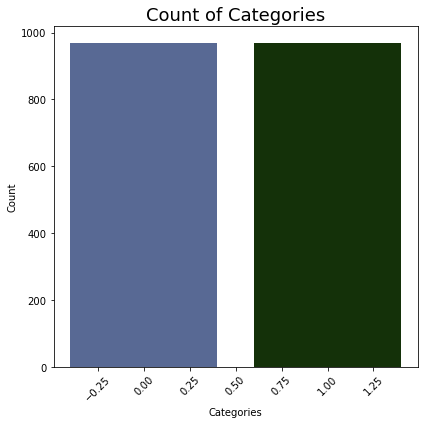

In [47]:
cat_counts = y_train.value_counts()

categories_counts_resampled = pd.Series(y_train).value_counts()
plt.figure(figsize=(6, 6))
plt.bar(cat_counts.index, cat_counts, color=custom_palette)
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Count of Categories', fontsize=18)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Sentiment Analysis

Is the process of determining the sentiment or subjective information expressed in a piece of text. It involves analyzing and extracting the emotions, attitudes, opinions, and feelings conveyed by the text, whether it is positive, negative, or neutral.

In [48]:
X_train = [' '.join(row[0]) for row in X_train]

In [49]:
sia = SentimentIntensityAnalyzer()

sentiments = []
for entity in X_train:
    sentiment = sia.polarity_scores(entity)
    sentiments.append(sentiment)

#### Vectorize 
I only vectorize the train data because it ensures the integrity and fairness of your model evaluation.

In [50]:
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)

#### Topic modeling
Removing bad vectors

In [51]:
nmf_model = NMF(n_components=5, random_state=42)
nmf_model.fit(X_train)

feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(nmf_model.components_):
    top_words = [feature_names[i] for i in topic.argsort()[:-6:-1]]
    print(f"Topic {topic_idx+1}: {' '.join(top_words)}")

Topic 1: get like dont man woman
Topic 2: sexual assault harass accus abus
Topic 3: women support men white believ
Topic 4: movement one shit joke guess
Topic 5: amp real abus hate sex


### Logistic regression

#### Createing the regression object
Next, I create the regression object for **logistic regression**,
and store it in the variable `model`.

In [52]:
lor = LogisticRegression()

#### Fiting the model

I will invoke the **`fit()`** function of the regression object,
supplying the selected data:

In [53]:
lor.fit(X_train, y_train)

LogisticRegression()

#### Assessing the model's quality

One way to assess the quality of a logistic regression model is to look at the acurracy score
which can be computed as follows:

In [54]:
y_train_pred = lor.predict(X_train)

accuracy = accuracy_score(y_train, y_train_pred)
print("Accuracy train data:", accuracy)

Accuracy train data: 0.9469072164948453


#### Tuning hyperparameters

Using a [grid search with cross-validation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) is a common approach for tuning hyperparameters in machine learning models.
GridSearchCV is a technique used for tuning the hyperparameters of a machine learning model. It is essentially an exhaustive search algorithm that searches through a specified hyperparameter space to find the combination of hyperparameters that results in the best performance for the model. It does this by training and evaluating the model using all possible combinations of hyperparameters, and then returns the combination that performs the best based on a specified evaluation metric. 

In [55]:
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid_search = GridSearchCV(lor, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best Hyperparameters: ", grid_search.best_params_)

Best Hyperparameters:  {'C': 10, 'penalty': 'l2'}


In [56]:
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_train, y_train)
print("Accuracy on Train Set: ", accuracy)

Accuracy on Train Set:  0.9969072164948454


### Decision-tree classifier

Next, we create the _decision-tree object_ for **decision tree mining**,
and store it in the variable `tree`.

In [57]:
tree = DecisionTreeClassifier()
tree

DecisionTreeClassifier()

#### Fitting the model

Invoke the **`fit()`** function of the decision-tree object,
supplying the selected data

In [58]:
tree.fit(X_train, y_train)

DecisionTreeClassifier()

#### Extract model parameters

In case of decision tree mining, there are relevant attributes of the decision-tree.

In [59]:
tree.tree_.node_count, tree.tree_.max_depth

(513, 127)

#### Assess the model's quality

The quality of a decision tree can be expressed as its _accuracy_ ,
obtained as follows:

In [60]:
train_score = tree.score(X_train, y_train)
print("Training score:", train_score)

Training score: 0.9994845360824742


#### Tuning hyperparameters

Using a [grid search with cross-validation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) is a common approach for tuning hyperparameters in machine learning models.
GridSearchCV is a technique used for tuning the hyperparameters of a machine learning model. It is essentially an exhaustive search algorithm that searches through a specified hyperparameter space to find the combination of hyperparameters that results in the best performance for the model. It does this by training and evaluating the model using all possible combinations of hyperparameters, and then returns the combination that performs the best based on a specified evaluation metric. 

In [61]:
param_grid = {
    'max_depth': [None, 3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(tree, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best score:  0.7788659793814432


With the new hyperparameters we can tune the model for better predictions. The grid search with cross-validation specifies that the best hyperparameters are the following: max_depth None, min_samples_leaf 4, min_samples_split 10.
The max_depth is maximum depth of the decision tree which should be 7 in our case. The min_samples_leaf specifies the minimum number of samples required to be in a leaf node. The min_samples_split determines the minimum number of samples required to split an internal node.

#### Visualize the model


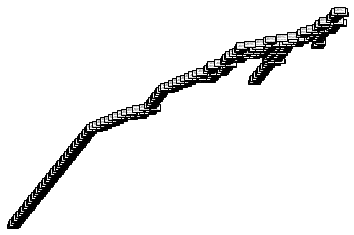

In [64]:
plot_tree(tree);

In [67]:
text_representation = export_text(tree)
print(text_representation)

|--- feature_5428 <= 0.05
|   |--- feature_1864 <= 0.06
|   |   |--- feature_2058 <= 0.06
|   |   |   |--- feature_4464 <= 0.07
|   |   |   |   |--- feature_1559 <= 0.07
|   |   |   |   |   |--- feature_4415 <= 0.06
|   |   |   |   |   |   |--- feature_2434 <= 0.07
|   |   |   |   |   |   |   |--- feature_2403 <= 0.06
|   |   |   |   |   |   |   |   |--- feature_1882 <= 0.07
|   |   |   |   |   |   |   |   |   |--- feature_3289 <= 0.06
|   |   |   |   |   |   |   |   |   |   |--- feature_3060 <= 0.13
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 117
|   |   |   |   |   |   |   |   |   |   |--- feature_3060 >  0.13
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 11
|   |   |   |   |   |   |   |   |   |--- feature_3289 >  0.06
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- feature_1882 >  0.07
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_2403 >

### K-nearest neighbor classifier

The K-nearest neighbor (KNN) classifier is a simple algorithm that assigns a label to a data point based on the labels of its closest neighbors. It works by calculating the distances between the new data point and all the training data points, selecting the K nearest neighbors, and assigning a label based on majority voting (classification) or averaging (regression). 

In [68]:
knn = KNeighborsClassifier(n_neighbors=5)

#### Fiting the model

I will invoke the **`fit()`** function of the knn object,
supplying the selected data:

In [69]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

#### Assessing the model's quality

One way to assess the quality of a logistic regression model is to look at the acurracy score
which can be computed as follows:

In [70]:
y_train_pred = knn.predict(X_train)
accuracy = accuracy_score(y_train, y_train_pred)
print("Accuracy:", accuracy)

Accuracy: 0.765979381443299


#### Tuning hyperparameters

Using a [grid search with cross-validation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) is a common approach for tuning hyperparameters in machine learning models.
GridSearchCV is a technique used for tuning the hyperparameters of a machine learning model. It is essentially an exhaustive search algorithm that searches through a specified hyperparameter space to find the combination of hyperparameters that results in the best performance for the model. It does this by training and evaluating the model using all possible combinations of hyperparameters, and then returns the combination that performs the best based on a specified evaluation metric. 

In [74]:
param_grid = {
    'n_neighbors': [3, 5, 7],  
    'weights': ['uniform', 'distance'], 
}


knn = KNeighborsClassifier()


grid_search = GridSearchCV(knn, param_grid, cv=5)  
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

print("Best Parameters:", best_params)

Best Parameters: {'n_neighbors': 7, 'weights': 'distance'}


### Effect of the hyper-parameters accuracy and ROC curve

First I'm going to build multiple models with different hyper-parameters, after the models are fitted next step is to look into different accuraccy values and roc curves. This would give me an ideea how the model performs and better understand it.

#### ROC curve

The ROC curve is a graph that shows how a model can distinguish between different classes. It shows the relationship between two things true positives and false positives. The curve allows you to compare different modelsand it gives an idea of how well your model is performing. 

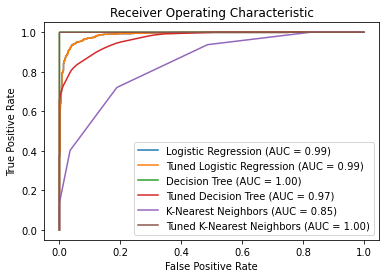

In [85]:
lor_prob_train = lor.predict_proba(X_train)[:, 1]
lor_tune_prob_train = lortune.predict_proba(X_train)[:, 1]
tree_prob_train = tree.predict_proba(X_train)[:, 1]
tree_tune_prob_train = tree_tune.predict_proba(X_train)[:, 1]
knn_prob_train = knn.predict_proba(X_train)[:, 1]
knn_tune_prob_train = knn_tune.predict_proba(X_train)[:, 1]

fpr_lor, tpr_lor, _ = roc_curve(y_train, lor_prob_train)
auc_lor = roc_auc_score(y_train, lor_prob_train)

fpr_lor_tune, tpr_lor_tune, _ = roc_curve(y_train, lor_tune_prob_train)
auc_lor_tune = roc_auc_score(y_train, lor_tune_prob_train)

fpr_tree, tpr_tree, _ = roc_curve(y_train, tree_prob_train)
auc_tree = roc_auc_score(y_train, tree_prob_train)

fpr_tree_tune, tpr_tree_tune, _ = roc_curve(y_train, tree_tune_prob_train)
auc_tree_tune = roc_auc_score(y_train, tree_tune_prob_train)

fpr_knn, tpr_knn, _ = roc_curve(y_train, knn_prob_train)
auc_knn = roc_auc_score(y_train, knn_prob_train)

fpr_knn_tune, tpr_knn_tune, _ = roc_curve(y_train, knn_tune_prob_train)
auc_knn_tune = roc_auc_score(y_train, knn_tune_prob_train)

plt.plot(fpr_lor, tpr_lor, label='Logistic Regression (AUC = {:.2f})'.format(auc_lor))
plt.plot(fpr_lor_tune, tpr_lor_tune, label='Tuned Logistic Regression (AUC = {:.2f})'.format(auc_lor_tune))
plt.plot(fpr_tree, tpr_tree, label='Decision Tree (AUC = {:.2f})'.format(auc_tree))
plt.plot(fpr_tree_tune, tpr_tree_tune, label='Tuned Decision Tree (AUC = {:.2f})'.format(auc_tree_tune))
plt.plot(fpr_knn, tpr_knn, label='K-Nearest Neighbors (AUC = {:.2f})'.format(auc_knn))
plt.plot(fpr_knn_tune, tpr_knn_tune, label='Tuned K-Nearest Neighbors (AUC = {:.2f})'.format(auc_knn_tune))

plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')


plt.legend(loc='lower right')

plt.show()

In [88]:
# Logistic Regression
lor_pred_train = lor.predict(X_train)
lor_pred_tune_train = lortune.predict(X_train)

accuracy_lor_train = accuracy_score(y_train, lor_pred_train)
precision_lor_train = precision_score(y_train, lor_pred_train)
recall_lor_train = recall_score(y_train, lor_pred_train)

accuracy_lor_tune_train = accuracy_score(y_train, lor_pred_tune_train)
precision_lor_tune_train = precision_score(y_train, lor_pred_tune_train)
recall_lor_tune_train = recall_score(y_train, lor_pred_tune_train)

# Decision Tree
tree_pred_train = tree.predict(X_train)
tree_pred_tune_train = tree_tune.predict(X_train)

accuracy_tree_train = accuracy_score(y_train, tree_pred_train)
precision_tree_train = precision_score(y_train, tree_pred_train)
recall_tree_train = recall_score(y_train, tree_pred_train)

accuracy_tree_tune_train = accuracy_score(y_train, tree_pred_tune_train)
precision_tree_tune_train = precision_score(y_train, tree_pred_tune_train)
recall_tree_tune_train = recall_score(y_train, tree_pred_tune_train)

# K-Nearest Neighbors
knn_pred_train = knn.predict(X_train)
knn_pred_tune_train = knn_tune.predict(X_train)

accuracy_knn_train = accuracy_score(y_train, knn_pred_train)
precision_knn_train = precision_score(y_train, knn_pred_train)
recall_knn_train = recall_score(y_train, knn_pred_train)

accuracy_knn_tune_train = accuracy_score(y_train, knn_pred_tune_train)
precision_knn_tune_train = precision_score(y_train, knn_pred_tune_train)
recall_knn_tune_train = recall_score(y_train, knn_pred_tune_train)

scores = {
    'Model': ['Logistic Regression', 'Tuned Logistic Regression', 'Decision Tree', 'Tuned Decision Tree', 'K-Nearest Neighbors', 'Tuned K-Nearest Neighbors'],
    'Accuracy': [accuracy_lor_train, accuracy_lor_tune_train, accuracy_tree_train, accuracy_tree_tune_train, accuracy_knn_train, accuracy_knn_tune_train],
    'Precision': [precision_lor_train, precision_lor_tune_train, precision_tree_train, precision_tree_tune_train, precision_knn_train, precision_knn_tune_train],
    'Recall': [recall_lor_train, recall_lor_tune_train, recall_tree_train, recall_tree_tune_train, recall_knn_train, recall_knn_tune_train]
}

scores_df = pd.DataFrame(scores)

scores_df

,Model,Accuracy,Precision,Recall
0,Logistic Regression,0.946907,0.958730,0.934021
1,Tuned Logistic Regression,0.946907,0.958730,0.934021
2,Decision Tree,0.999485,1.000000,0.998969
3,Tuned Decision Tree,0.889175,0.934407,0.837113
4,K-Nearest Neighbors,0.765979,0.792517,0.720619
5,Tuned K-Nearest Neighbors,0.999485,1.000000,0.998969


## Conclusion

The models are not as reliable but I still work to improve on.

Text-preprocessing came up to be a really challanging task for me but still was engaging. Vectorizing made a lot of problem with scoring the acccuracy due to the nature of how vectorizing works. I still made some progress and created a few models.

### Thank you!

# REFERANCES 

    Wikipedia. (n.d.). Data modeling. Retrieved from https://en.wikipedia.org/wiki/Data_modeling

    Kaggle. (n.d.). Diabetes Prediction Dataset. Retrieved from https://www.kaggle.com/datasets/iammustafatz

    Ferreira, N. (n.d.). From Data to Viz. Retrieved from https://www.data-to-viz.com/

    scikit-learn. (n.d.). GridSearchCV. Retrieved from https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

    Lemaitre, G., Nogueira, F., & Aridas, C. (2021). imbalanced-learn: A Python Toolbox to Tackle the Curse of   Imbalanced Datasets in Machine Learning. Journal of Machine Learning Research, 18(17), 1-5. Retrieved from https://pypi.org/project/imbalanced-learn/

    Wikipedia. (n.d.). Receiver Operating Characteristic. Retrieved from https://en.wikipedia.org/wiki/Receiver_operating_characteristicestablishing
    
    Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., ... & Vanderplas, J. (2011). Scikit-learn: Machine learning in Python. Journal of Machine Learning Research, 12(Oct), 2825-2830. Retrieved from https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

    Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., ... & Vanderplas, J. (2011). Scikit-learn: Machine learning in Python. Journal of Machine Learning Research, 12(Oct), 2825-2830. Retrieved from https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html

    Goel, R. (2021). Hatred on Twitter during #MeToo Movement. Retrieved from https://www.kaggle.com/datasets/rahulgoel1106/hatred-on-twitter-during-metoo-movement

    Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., ... & Vanderplas, J. (2011). Scikit-learn: Machine learning in Python. Journal of Machine Learning Research, 12(Oct), 2825-2830. Retrieved from https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

    Khan, S. (2020, March 24). Topic Modeling Articles with NMF. Towards Data Science. Retrieved from https://towardsdatascience.com/topic-modeling-articles-with-nmf-8c6b2a227a45